In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# EDA with PTC -> Shipping Data

In [17]:
df = pd.read_csv("PTC to Shipping/DC840 PTC Out.csv")

In [18]:
df.shape

(57317, 11)

In [19]:
df.head()

,Unnamed: 0,CNTR_NBR,MODULE_NAME,MENU_OPTN_NAME,FROM_LOCN,NBR_UNITS,TO_LOCN,USER_ID,BEGIN_DATE,END_DATE,RECORD_CREATED
0,0,JH6510254,Shipping,Anchor oLPN *,622185,5,128S,msemper,2024-02-17 14:15:35,2024-02-17 14:17:54,17-FEB-24 02.17.54.000000000 PM
1,1,JM6643870,Shipping,Anchor oLPN *,662010,13,174S,msanchez,2024-02-18 11:19:02,2024-02-18 11:19:48,18-FEB-24 11.19.48.000000000 AM
2,2,JM6619861,Shipping,Anchor oLPN *,662075,49,116S,cwells,2024-02-18 11:22:30,2024-02-18 11:26:12,18-FEB-24 11.26.12.000000000 AM
3,3,JM6633313,Shipping,Anchor oLPN *,652090,43,080S,msanchez,2024-02-18 11:24:42,2024-02-18 11:28:04,18-FEB-24 11.28.04.000000000 AM
4,4,JM6619820,Shipping,Anchor oLPN *,662015,38,061S,mdaniels,2024-02-18 11:31:37,2024-02-18 11:33:46,18-FEB-24 11.33.46.000000000 AM


## Convert to datetime format and remove unnecessary cols

In [20]:
# convert 2024-02-17 14:15:35 to datetime
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
columns_to_drop = [df.columns[0], 'RECORD_CREATED', 'MODULE_NAME', 'MENU_OPTN_NAME', 'NBR_UNITS']
for col in columns_to_drop:
    try:
        df.drop(columns=[col], inplace=True)
    except:
        continue
df['FROM_LOCN'] = df['FROM_LOCN'].astype(str)
df['TO_LOCN'] = df['TO_LOCN'].astype(str)
df.head()


,CNTR_NBR,FROM_LOCN,TO_LOCN,USER_ID,BEGIN_DATE,END_DATE
0,JH6510254,622185,128S,msemper,2024-02-17 14:15:35,2024-02-17 14:17:54
1,JM6643870,662010,174S,msanchez,2024-02-18 11:19:02,2024-02-18 11:19:48
2,JM6619861,662075,116S,cwells,2024-02-18 11:22:30,2024-02-18 11:26:12
3,JM6633313,652090,080S,msanchez,2024-02-18 11:24:42,2024-02-18 11:28:04
4,JM6619820,662015,061S,mdaniels,2024-02-18 11:31:37,2024-02-18 11:33:46


## Format start/end locns

In [21]:
df["FROM_LOCN"] = df["FROM_LOCN"].str[:3]

In [24]:
l = list(set(df["TO_LOCN"]))
for x in l:
    print(x)


003S
120S
057S
233S
082S
078S
150S
066S
055S
201S
085S
225S
088S
073S
221S
128S
229S
070S
174S
168S
164S
136S
132S
061S
234CDY1
112S
114S
238CDY1
166S
158S
213S
124S
231S
110S
076S
230CDY1
219S
140S
118S
223S
080S
240CDY1
152S
057CDY2
062S
086S
055CDY2
074S
071S
126S
146S
087S
134S
156S
235S
236CDY1
106S
215S
061CDY1
242CDY1
079S
243S
059S
075S
063S
116S
081S
083S
055CDY1
067S
239S
004S
064S
077S
122S
209S
217S
064CDY1
058S
237S
205S
148S
244CDY1
068S
138S
108S
130S
066CDY1
170S
154S
065S
069S
211S
056S
057CDY1
084S
207S
241S
060S
203S
227S
072S
160S
162S


In [45]:
df.sort_values(by="BEGIN_DATE")
df.head()

,CNTR_NBR,FROM_LOCN,TO_LOCN,USER_ID,BEGIN_DATE,END_DATE
0,UM14399512,682,161S,bpacheco,2024-02-28 12:19:55,2024-02-28 12:20:54
1,UT13367251,682,161S,hsanchez,2024-03-01 00:41:07,2024-03-01 00:41:36
2,US65282597,682,059S,dvargas,2024-03-03 12:22:57,2024-03-03 12:23:55
3,UH14219156,682,059S,acarrasco,2024-03-07 23:53:25,2024-03-07 23:54:44
4,US65325863,682,059S,tmorales,2024-03-09 11:51:28,2024-03-09 11:52:41


## Calculate time_taken and explore distributions

In [46]:
df["time_taken"] = df["END_DATE"] - df["BEGIN_DATE"]
df['time_taken'] = df['time_taken'].apply(lambda x: x.total_seconds())

In [47]:
df['time_taken'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.9325, 0.935, 0.9375, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995])

0.1000     31.0
0.2000     40.0
0.3000     48.0
0.4000     57.0
0.5000     66.0
0.6000     75.0
0.7000     87.0
0.8000    103.0
0.9000    136.0
0.9100    142.0
0.9200    149.0
0.9300    157.0
0.9325    159.0
0.9350    161.0
0.9375    164.0
0.9400    166.0
0.9500    178.0
0.9600    194.0
0.9700    215.0
0.9800    252.0
0.9900    339.0
0.9950    485.0
Name: time_taken, dtype: float64

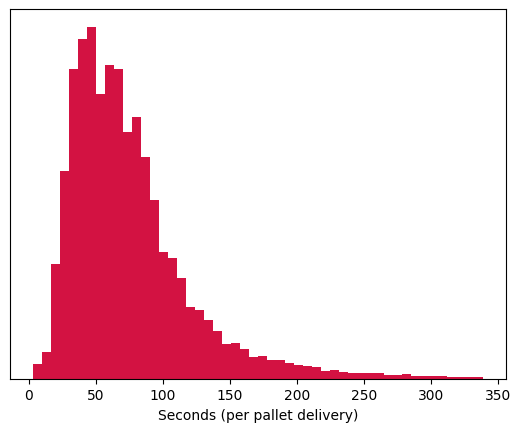

In [48]:
percentile = 0.99
df = df.sort_values(by='time_taken')
threshold_index = int(len(df) * percentile)
df = df.iloc[:threshold_index]
df = df[df['time_taken'] > 0]
plt.hist(df['time_taken'], bins=50, color='#D31242')
ax = plt.gca()
plt.xlabel('Seconds (per pallet delivery)')
ax.get_yaxis().set_visible(False)
plt.show()

In [49]:
df

,CNTR_NBR,FROM_LOCN,TO_LOCN,USER_ID,BEGIN_DATE,END_DATE,time_taken
26989,UW13594305,622,073S,svasquez,2024-03-21 15:50:30,2024-03-21 15:50:33,3.0
5069,US65179502,682,144S,hcruz,2024-05-20 05:55:24,2024-05-20 05:55:27,3.0
68118,UM13998455,622,040S,svasquez,2024-04-09 21:38:36,2024-04-09 21:38:39,3.0
2018,UW13739272,682,149S,llopez,2024-02-26 18:32:42,2024-02-26 18:32:45,3.0
63577,UT13366391,622,085S,svasquez,2024-02-27 16:56:06,2024-02-27 16:56:09,3.0
...,...,...,...,...,...,...,...
39460,UH14181717,632,070S,cdeleon,2024-02-15 12:53:32,2024-02-15 12:59:10,338.0
20165,UW14174538,622,053S,mfamilia,2024-04-09 15:43:49,2024-04-09 15:49:27,338.0
16674,UH14093486,632,051S,ryoung,2024-03-04 04:11:30,2024-03-04 04:17:08,338.0
33296,UW14174796,632,061S,rrosario,2024-04-10 04:40:19,2024-04-10 04:45:57,338.0
